## Introduction
Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 

## Objective
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


1. Basic Library imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company_data = pd.read_csv("Company_Data.csv")
company_data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


## EDA and Data preprocessing

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Let's covert the Sales into categorical vartiable considering Sales < 7.49 (low) and Sales > 7.49 High

In [6]:
dataframe = company_data.copy()

In [7]:
pd.cut(dataframe['Sales'],bins=[0,7.49,16.27], labels=['Low','High'])

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [8]:
dataframe['Sales'] = pd.cut(dataframe['Sales'],bins=[0,7.49,16.27], labels=['Low','High'])

In [9]:
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes


## Let's convert first explore every categorical feature and then make them suitable to be used with models

* Transformation For 'Sales' - The Target Variable

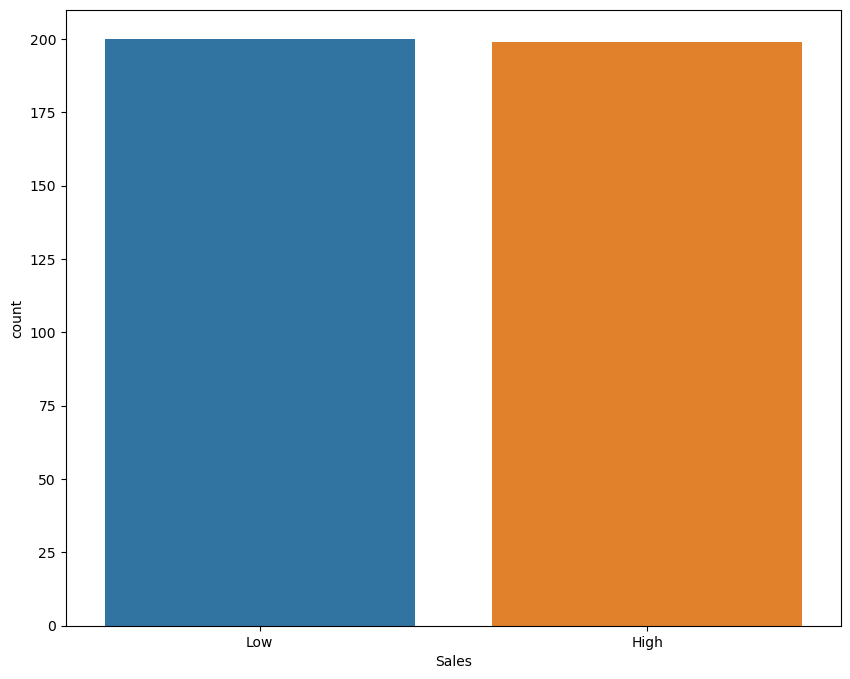

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataframe['Sales'])
plt.show()

In [11]:
dataframe['Sales'] = pd.get_dummies(dataframe['Sales'],drop_first=True)
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes


* Transformation for 'ShelveLoc' - One of the Categorical Independent Variable

In [12]:
dataframe['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

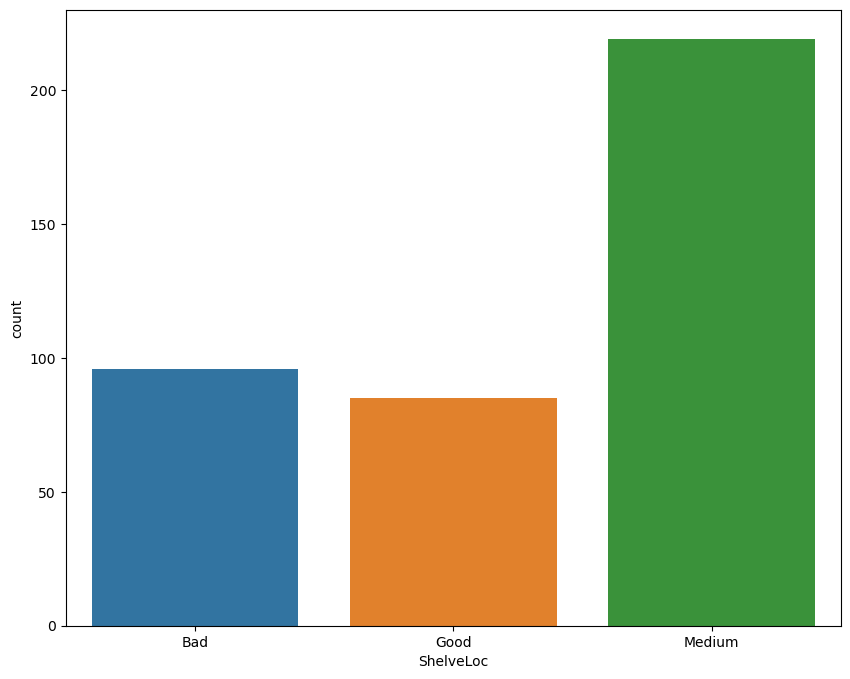

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataframe['ShelveLoc'])
plt.show()

In [14]:
pd.get_dummies(dataframe['ShelveLoc'],drop_first=True)

,Good,Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0
...,...,...
395,1,0
396,0,1
397,0,1
398,0,0


In [15]:
dataframe[['Good_ShelveLoc','Medium_ShelveLoc']] = pd.get_dummies(dataframe['ShelveLoc'],drop_first=True)
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,1,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1


* Transformation for 'Urban' - One of the Categorical Independent Variable

In [16]:
dataframe['Urban'].unique()

array(['Yes', 'No'], dtype=object)

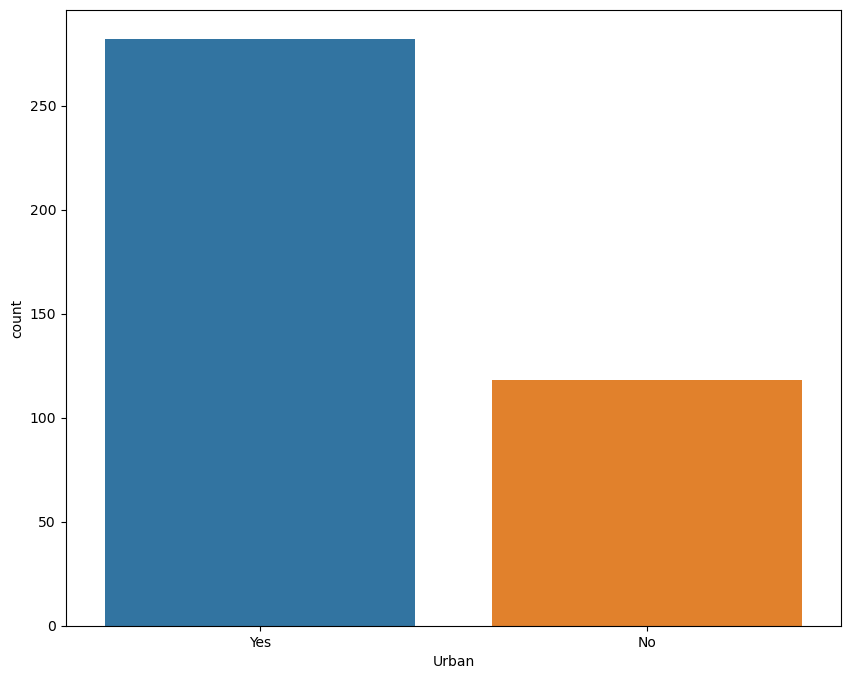

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataframe['Urban'])
plt.show()

In [18]:
pd.get_dummies(dataframe['Urban'],drop_first=True)

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
395,1
396,0
397,1
398,1


In [19]:
dataframe['Urban'] = pd.get_dummies(dataframe['Urban'],drop_first=True)
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
0,1,138,73,11,276,120,Bad,42,17,1,Yes,0,0
1,1,111,48,16,260,83,Good,65,10,1,Yes,1,0
2,1,113,35,10,269,80,Medium,59,12,1,Yes,0,1


* Transformation for 'US' - One of the Categorical Independent Variable

In [20]:
dataframe['US'].unique()

array(['Yes', 'No'], dtype=object)

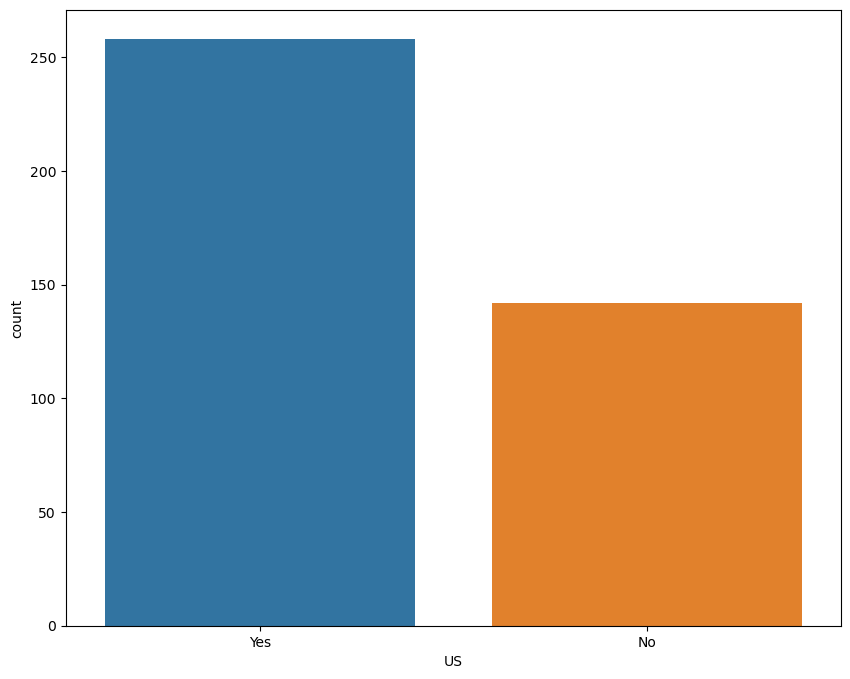

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataframe['US'])
plt.show()

In [22]:
pd.get_dummies(dataframe['US'],drop_first=True)

,Yes
0,1
1,1
2,1
3,1
4,0
...,...
395,1
396,1
397,1
398,1


In [23]:
dataframe['US'] = pd.get_dummies(dataframe['US'],drop_first=True)
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
0,1,138,73,11,276,120,Bad,42,17,1,1,0,0
1,1,111,48,16,260,83,Good,65,10,1,1,1,0
2,1,113,35,10,269,80,Medium,59,12,1,1,0,1


## Let's Drop 'ShelveLoc' feature because it is not required now''

In [24]:
dataframe.drop('ShelveLoc',axis=1,inplace=True)
dataframe.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
0,1,138,73,11,276,120,42,17,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,1,0
2,1,113,35,10,269,80,59,12,1,1,0,1


## Splitting the Features into dependent and Independent ones

In [25]:
y,x = dataframe.iloc[:,0],dataframe.iloc[:,1:]

In [26]:
y.head(3)

0    1
1    1
2    1
Name: Sales, dtype: uint8

In [27]:
x.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
0,138,73,11,276,120,42,17,1,1,0,0
1,111,48,16,260,83,65,10,1,1,1,0
2,113,35,10,269,80,59,12,1,1,0,1


## Data split into 'train' and 'test'  part

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [30]:
x_train.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
157,121,58,8,249,90,48,13,0,1,0,1
109,115,65,0,217,90,60,17,0,0,0,1
17,147,74,13,251,131,52,10,1,1,1,0


In [31]:
x_test.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good_ShelveLoc,Medium_ShelveLoc
209,98,21,11,326,90,76,11,0,1,0,0
280,121,86,10,496,145,51,10,1,1,0,0
33,114,38,13,317,128,50,16,1,1,1,0


In [32]:
y_train.head(3)

157    1
109    1
17     1
Name: Sales, dtype: uint8

In [33]:
y_test.head(3)

209    0
280    0
33     1
Name: Sales, dtype: uint8

## Model Building, Training and Testing using the criteria == 'gini' and n_estimators = 20 (Number of Decision Trees made to comeup with classification = 20)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfs = RandomForestClassifier(n_estimators=20,random_state=42)

In [36]:
rfs.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [37]:
test_pred = rfs.predict(x_test)

In [38]:
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

## Checking the accuracy of prediction 

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
print(f"""
          The Accuracy for classification of Training Data is {accuracy_score(y_train,rfs.predict(x_train))}
          The Accuracy for classification of Testing Data is {accuracy_score(y_test,test_pred)}
          """)


          The Accuracy for classification of Training Data is 1.0
          The Accuracy for classification of Testing Data is 0.8333333333333334
          


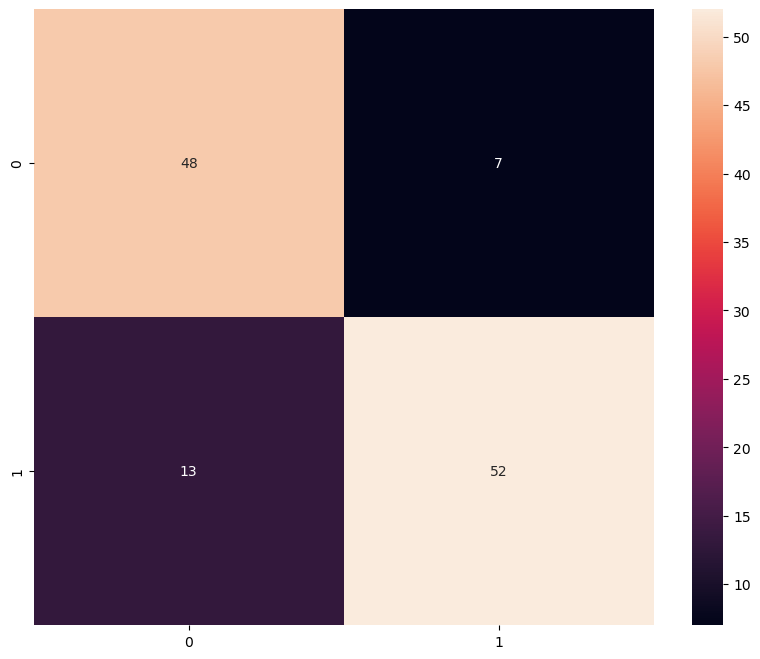

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True)
plt.show()

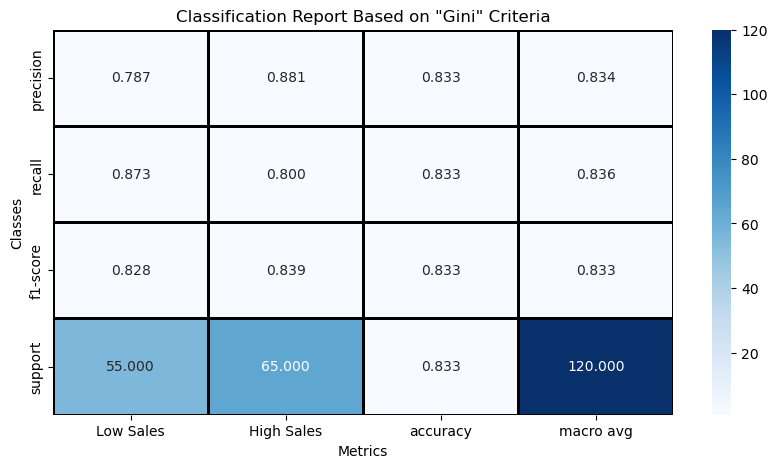

In [43]:
report = classification_report(y_test, test_pred, target_names=['Low Sales','High Sales'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report Based on "Gini" Criteria')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Model Building, Training and Testing using the criteria == 'entropy' and n_estimators = 20(Number of Backend Decision Trees = 25)

In [44]:
rfi = RandomForestClassifier(n_estimators=25, criterion='entropy',random_state=42)

In [45]:
rfi.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=42)

In [46]:
test_pred_ig = rfi.predict(x_test)

In [47]:
print(f"""
          The Accuracy for classification of Training Data is {accuracy_score(y_train,rfi.predict(x_train))}
          The Accuracy for classification of Testing Data is {accuracy_score(y_test,test_pred_ig)}
          """)


          The Accuracy for classification of Training Data is 1.0
          The Accuracy for classification of Testing Data is 0.825
          


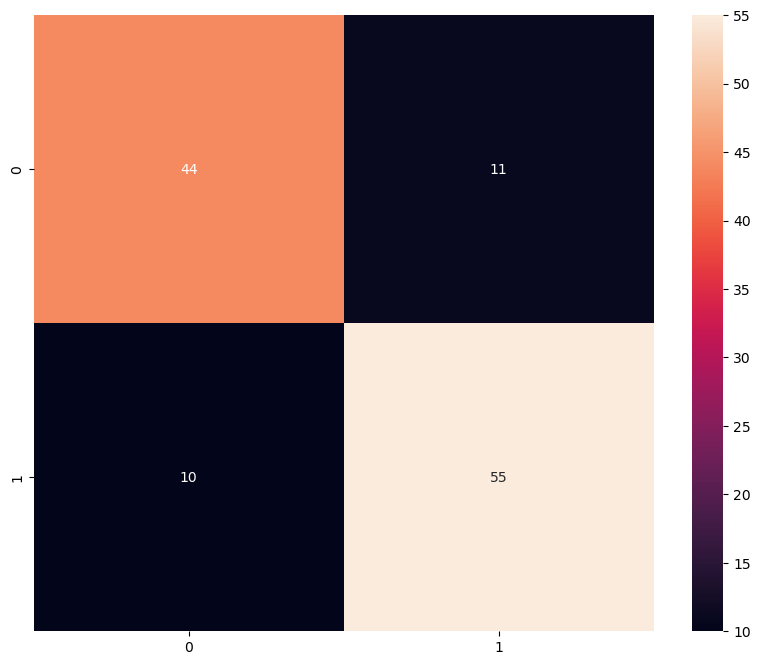

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,test_pred_ig),annot=True)
plt.show()

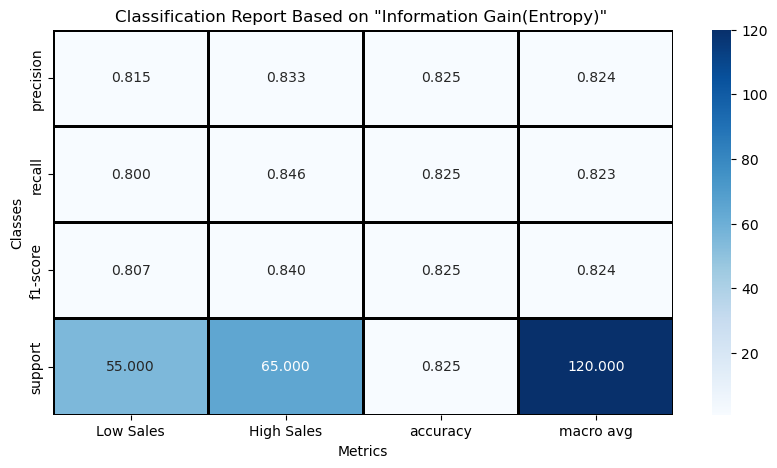

In [49]:
report = classification_report(y_test, test_pred_ig, target_names=['Low Sales','High Sales'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report Based on "Information Gain(Entropy)" ')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


## Even Though the accuracy for the unseen data is nearly same based of both criteria.

## The F1-Score for the criteria = 'Ginni' is higher so model build with 'Ginni' Criterian should be selected